In [2]:
# Auto-reloading imports on external change. Re-import is necessary though.
%load_ext autoreload
%autoreload 2

from pathlib import Path

import os
import sys
# root = Path().resolve().parents[1]
# sys.path.append(str(root))

import numpy as np
import tensorflow as tf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from model import load_trained_model

from sudoku.image_parser_copy import (
    load_image,
    parse_grid
)

from sudoku.plotting import (
    show_image,
    image_from_digits,
    plot_many_images
)

In [4]:
def scale_and_reshape(img):
    return ((img)/255).reshape(1, 28, 28, 1)


def extract_sudoku(digits, model):
    pred_sudoku = np.zeros((81, 1))
    for i in range(len(digits)):
        if (digits[i]/255).mean()==0.0:
            pred_sudoku[i] = np.nan
        else:
            img = scale_and_reshape(digits[i])    
            pred = model.predict(img)
            pred_sudoku[i] = pred.argmax()
    return pred_sudoku.reshape(9, 9) 


def parse_sudoku(path):
    img = load_image(path)
    digits = parse_grid(img)
    digit_img = image_from_digits(digits)

    model = load_trained_model("model_weights_custom.hdf5")
    sudoku = extract_sudoku(digits, model)
    
    show_image(digit_img)
    print(sudoku)
    return sudoku


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


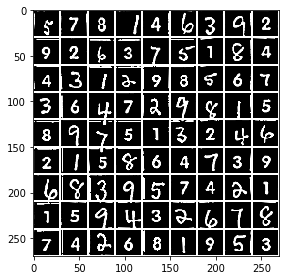

[[3. 7. 8. 8. 9. 6. 3. 9. 2.]
 [9. 0. 0. 3. 7. 5. 1. 8. 9.]
 [6. 3. 7. 2. 3. 6. 5. 6. 7.]
 [3. 6. 0. 7. 2. 9. 8. 1. 5.]
 [8. 9. 5. 3. 1. 3. 2. 2. 6.]
 [0. 7. 5. 8. 6. 6. 7. 3. 9.]
 [1. 8. 3. 9. 5. 7. 9. 2. 1.]
 [1. 5. 9. 0. 3. 2. 0. 7. 8.]
 [7. 1. 2. 6. 8. 1. 9. 5. 3.]]


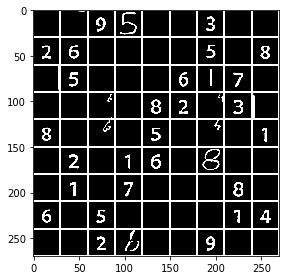

[[nan  0.  9.  5. nan  0.  3. nan nan]
 [ 2.  6. nan nan nan nan  5. nan  8.]
 [ 0.  5. nan nan nan  6.  1.  7.  0.]
 [ 0. nan  5. nan  8.  2.  0.  3.  0.]
 [ 8. nan  0. nan  5. nan  0. nan  1.]
 [nan  2. nan  1.  6. nan  8.  0.  0.]
 [nan  1. nan  7. nan nan nan  8. nan]
 [ 6. nan  5. nan nan nan  0.  1.  9.]
 [nan nan  2.  1. nan nan  9. nan  0.]]


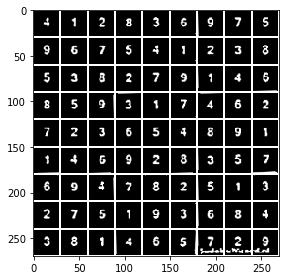

[[9. 1. 3. 9. 9. 9. 9. 7. 9.]
 [9. 9. 3. 9. 9. 1. 3. 9. 9.]
 [9. 9. 9. 3. 7. 9. 9. 9. 9.]
 [9. 9. 9. 9. 9. 7. 9. 9. 3.]
 [3. 3. 9. 9. 9. 9. 9. 9. 9.]
 [1. 9. 9. 9. 3. 9. 9. 9. 3.]
 [9. 9. 9. 3. 9. 3. 9. 0. 9.]
 [3. 3. 9. 1. 9. 9. 9. 9. 9.]
 [9. 9. 1. 3. 9. 9. 3. 3. 9.]]


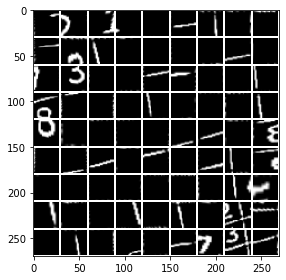

[[ 0.  7.  0.  0.  0.  2.  4.  0.  0.]
 [ 5.  2.  0.  0. nan  0.  0.  1.  0.]
 [ 0.  2.  0.  0.  7.  7.  0.  0.  0.]
 [ 3.  0.  0.  0.  6.  0.  0.  0.  6.]
 [ 4.  0.  0.  0.  0.  0.  2.  0.  4.]
 [ 0.  0.  2.  0.  7.  0.  1.  6.  7.]
 [ 0.  0.  0.  0.  0.  0.  0.  6.  0.]
 [ 0.  0.  0.  0.  0.  6.  0.  2.  7.]
 [ 0.  1.  0.  0.  0.  2.  0.  2.  7.]]


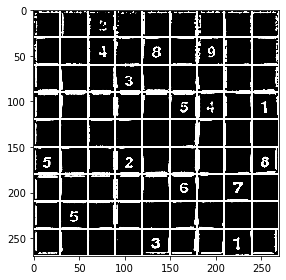

[[ 0.  0.  3.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  2.  0.  8.  0.  3.  0.  0.]
 [ 0.  0.  0.  3.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  5.  8.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 5.  0.  0.  6.  0.  0.  0.  0.  8.]
 [ 0.  0.  0.  0.  0.  6.  0.  7. nan]
 [ 0.  5.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  3.  0.  0.  1.  0.]]


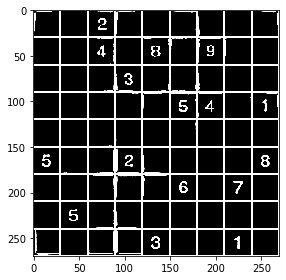

[[ 0. nan  2.  0. nan  0.  0.  0.  0.]
 [nan nan  9.  0.  9.  0.  9.  0.  0.]
 [ 0.  0.  0.  3.  0.  0.  0. nan  0.]
 [nan nan  0.  0.  0.  5.  8.  0.  3.]
 [nan nan  0.  0. nan  0. nan nan nan]
 [ 5.  0.  0.  2.  0.  0. nan nan  8.]
 [nan nan  0.  0.  0.  9. nan  7. nan]
 [nan  5.  0.  0. nan nan nan nan nan]
 [ 0. nan  0.  0.  3. nan nan  1. nan]]


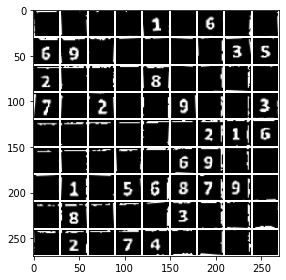

[[ 0.  0.  0.  0.  1.  0.  9.  0.  0.]
 [ 6.  3.  0.  0.  0.  0.  0.  3.  5.]
 [ 2.  0.  0.  0.  8.  0.  0.  0.  0.]
 [ 7.  0.  2.  0.  0.  9.  0.  0.  3.]
 [ 0.  0.  7.  0.  0.  0.  2.  0.  6.]
 [ 0.  0.  0.  7.  0.  6.  8.  0.  0.]
 [ 0.  1.  0.  5.  8.  8.  7.  9.  0.]
 [ 0.  8.  0.  0.  0.  3.  0.  0.  0.]
 [ 7.  2.  0.  7.  8.  0.  0.  0. nan]]


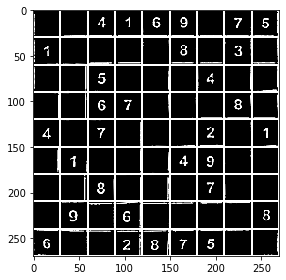

[[ 0.  0.  9.  1.  9.  9.  0.  7.  9.]
 [ 1.  0.  0.  0.  0.  9.  0.  3.  0.]
 [ 0.  0.  9.  0.  0.  0.  9.  0.  0.]
 [ 0.  0.  9.  3.  0.  0.  0.  9.  0.]
 [ 3.  0.  7.  0.  0.  0.  3.  0.  1.]
 [ 0.  1.  0.  0.  0.  9.  9.  0.  0.]
 [ 0.  0.  8.  0.  0. nan  7.  0.  0.]
 [ 0.  9.  0.  0.  0.  0.  0.  0.  8.]
 [ 6.  0.  0.  2.  8.  7.  3.  0.  0.]]


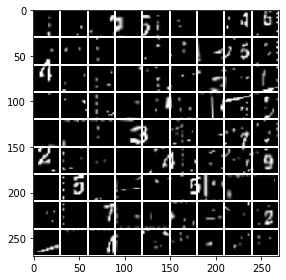

[[ 0.  0.  0.  0.  7.  0. nan  0.  3.]
 [ 0.  0.  0. nan  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  2.  0.  0.  0.  1.  7.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  7.  0.]
 [ 4.  0.  0. nan  0.  0.  0.  0.  9.]
 [nan  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  7.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.]]


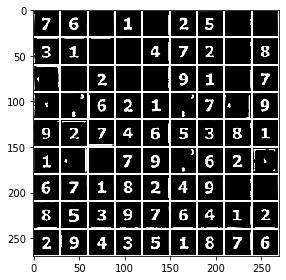

[[7. 5. 0. 1. 0. 2. 5. 0. 0.]
 [3. 1. 0. 0. 9. 7. 2. 0. 8.]
 [0. 0. 2. 0. 0. 9. 1. 0. 7.]
 [0. 0. 5. 2. 1. 0. 7. 0. 9.]
 [9. 2. 7. 9. 5. 5. 3. 8. 1.]
 [1. 0. 0. 7. 9. 0. 6. 2. 0.]
 [9. 7. 3. 9. 2. 9. 9. 0. 0.]
 [8. 5. 3. 9. 7. 9. 9. 2. 2.]
 [2. 9. 9. 3. 5. 1. 8. 7. 5.]]


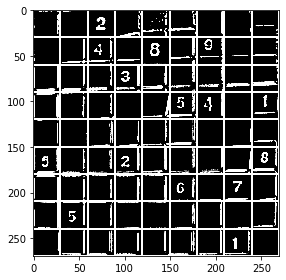

[[ 0.  0.  2.  0.  1.  1.  0.  0.  2.]
 [ 0.  0.  9.  0.  9.  1.  1.  2.  2.]
 [ 0.  0.  0.  9.  0.  1.  1.  1.  2.]
 [ 0.  0.  0.  0.  0.  9.  9.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 9.  0.  0.  2.  0.  0.  0.  0.  9.]
 [ 0.  0.  0.  0.  0.  9.  0.  3.  0.]
 [ 0.  5.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. nan]]


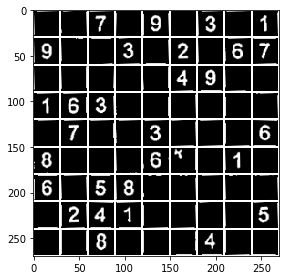

[[ 0.  0.  7.  0.  9.  0.  3.  0.  1.]
 [ 9.  0.  0.  3.  0.  2.  0.  5.  7.]
 [ 0.  0.  0.  0.  0.  4.  9.  0.  0.]
 [ 1.  8.  3.  0.  0.  0.  0.  0.  0.]
 [ 0.  7.  0.  0.  3.  0.  0.  0.  5.]
 [ 8. nan  0.  0.  5.  7.  0.  1.  0.]
 [ 6.  0.  5.  8.  0.  0.  0.  0.  0.]
 [ 0.  2.  4.  1.  0.  0.  0.  0.  5.]
 [nan  0.  8.  0.  0.  0.  4.  0.  0.]]


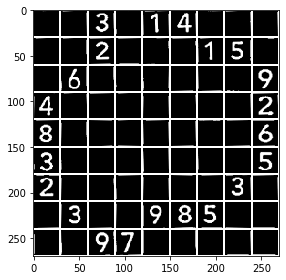

[[ 0.  0.  3.  0.  1.  4.  0.  0.  0.]
 [ 0.  0.  2.  0.  0.  0.  1.  5.  0.]
 [ 0.  6.  0.  0.  0.  0.  0.  0.  9.]
 [ 4.  0.  0.  0.  0.  0.  0.  0.  2.]
 [ 8.  0.  0.  0.  0.  0.  0.  0.  6.]
 [ 3.  0.  0.  0.  0.  0.  0.  0.  5.]
 [ 2.  0.  0.  0.  0.  0.  0.  3.  0.]
 [ 0.  3.  0.  0.  9.  8.  5.  0.  0.]
 [ 0.  0.  9.  7.  0.  0. nan  0.  0.]]


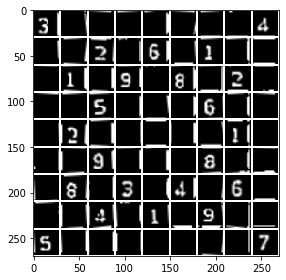

[[ 3.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  7.  0.  8.  0.  0.  0.  0.]
 [ 0.  0.  0.  9.  0.  8.  0.  3.  0.]
 [ 0.  0.  5.  0.  0.  0.  8.  0.  0.]
 [ 0.  3.  0.  0.  0.  0.  0.  0. nan]
 [ 0.  0.  9.  0.  0. nan  0.  0.  0.]
 [ 0.  8.  0.  3.  0.  0.  0.  8.  0.]
 [ 0.  0.  9.  0.  0.  0.  9.  0.  0.]
 [ 5.  0.  0.  0. nan nan  0.  0.  7.]]


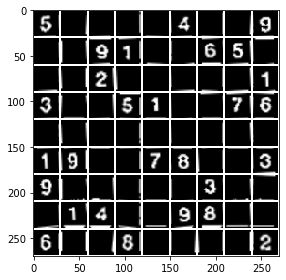

[[ 5.  0.  0.  0.  0.  3.  0.  0.  9.]
 [ 0.  0.  9.  1.  0.  0.  9.  5.  0.]
 [ 0.  0.  2.  0. nan  0.  0.  0.  1.]
 [ 3.  0.  0.  5.  1.  0.  0.  7.  6.]
 [ 0.  0.  0.  0. nan  0.  0.  0.  0.]
 [ 1.  9.  0.  0.  7.  8.  0.  0.  3.]
 [ 9.  0.  0.  0.  0.  0.  3.  0.  0.]
 [ 0.  1.  9.  0.  0.  9.  9.  0.  0.]
 [ 8.  0.  0.  9. nan  0.  0.  0.  2.]]


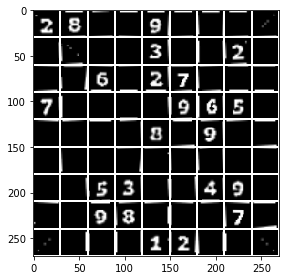

[[ 7.  8.  0.  0.  9.  0.  0.  0.  0.]
 [ 0.  0. nan nan  3. nan  0.  2. nan]
 [ 0.  0.  6.  0.  2.  7.  0.  0.  0.]
 [ 7.  0. nan  0.  0.  9.  6.  5. nan]
 [ 0.  0.  0.  0.  0.  0.  9.  0.  0.]
 [nan  0. nan  0.  0.  0.  0. nan  0.]
 [nan  0.  5.  3.  0.  0.  9.  9. nan]
 [ 0. nan  9.  8.  0.  0.  0.  7.  0.]
 [ 0.  0.  0.  0.  1.  2.  0.  0.  0.]]


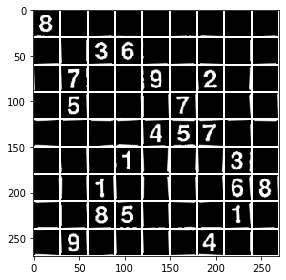

[[8. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 3. 5. 0. 0. 0. 0. 0.]
 [0. 7. 0. 0. 9. 0. 2. 0. 0.]
 [0. 5. 0. 0. 0. 7. 0. 0. 0.]
 [0. 0. 0. 0. 4. 5. 7. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 3. 0.]
 [0. 0. 1. 0. 0. 0. 0. 6. 8.]
 [0. 0. 8. 5. 0. 0. 0. 1. 0.]
 [0. 9. 0. 0. 0. 0. 9. 0. 0.]]


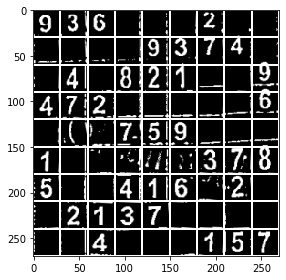

[[ 9.  3.  6.  0.  0.  0.  4.  0.  0.]
 [ 0.  0.  0.  0.  9.  9.  4.  4.  0.]
 [ 0.  9.  0.  8.  2.  7.  1.  0.  1.]
 [ 4.  7.  2.  0.  0.  0.  0.  1.  9.]
 [ 0.  6.  0.  2.  3.  9.  0.  0.  1.]
 [ 1.  0.  0.  3.  1.  5.  3.  7.  8.]
 [ 5.  0.  0.  1.  0.  6.  0.  2.  0.]
 [ 0.  2.  1.  3.  7.  0.  0.  0. nan]
 [ 0.  0.  9.  0. nan  0.  1.  5.  7.]]


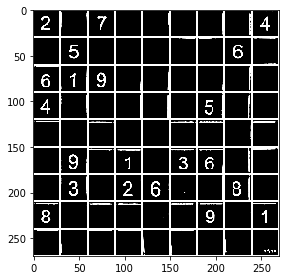

[[ 2.  0.  7.  0.  0. nan  0.  0.  4.]
 [nan  5. nan nan nan  0.  0.  5.  0.]
 [ 8.  1.  9.  0.  0.  0.  0.  0.  0.]
 [ 9.  0. nan  0.  0. nan  5.  0. nan]
 [ 0. nan  0. nan nan  0.  0.  0.  0.]
 [ 0.  9.  0.  7. nan  3.  8.  0.  0.]
 [ 0.  3. nan  2.  8.  0.  0.  8. nan]
 [ 8.  0.  0.  0.  0.  0.  9.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [5]:
for filename in os.listdir('data/examples/'):
#     print(filename)
    if filename.endswith(".jpg") or filename.endswith(".png"): 
         parse_sudoku('data/examples/' + filename)

8.jpg


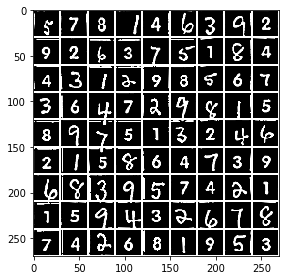

[[3 7 8 0 4 6 3 9 2]
 [6 2 6 3 7 5 1 8 4]
 [6 3 7 8 5 8 8 6 7]
 [3 6 0 7 2 9 8 1 5]
 [8 9 0 5 1 3 2 2 6]
 [2 7 5 8 6 4 7 3 9]
 [1 8 3 9 5 7 4 2 1]
 [1 5 9 0 3 2 0 7 8]
 [7 7 2 6 8 1 9 5 3]]
9.jpg


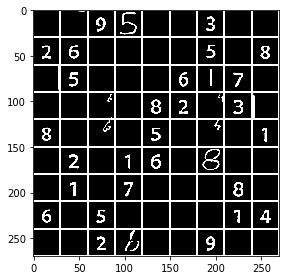

[[nan  0.  9.  5. nan  0.  3. nan nan]
 [ 2.  6. nan nan nan nan  5. nan  8.]
 [ 0.  5. nan nan nan  6.  1.  7.  0.]
 [ 0. nan  0. nan  8.  2.  0.  3.  0.]
 [ 8. nan  4. nan  5. nan  0. nan  1.]
 [nan  2. nan  1.  6. nan  8.  0.  0.]
 [nan  1. nan  7. nan nan nan  8. nan]
 [ 6. nan  5. nan nan nan  0.  1.  4.]
 [nan nan  2.  1. nan nan  9. nan  0.]]
14.png


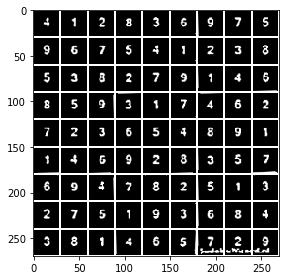

[[4 1 3 8 3 8 9 7 8]
 [9 8 3 8 4 1 3 3 8]
 [5 3 3 3 7 9 1 4 8]
 [9 8 9 3 1 7 4 8 3]
 [7 3 3 8 8 4 8 9 1]
 [1 4 6 9 3 8 3 5 7]
 [8 9 4 7 8 3 5 1 3]
 [3 7 9 1 9 3 8 8 4]
 [3 3 1 4 8 5 3 3 9]]
15.png


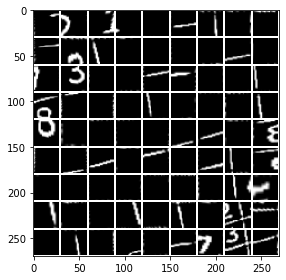

[[ 0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 5.  2.  0.  0. nan  0.  0.  1.  0.]
 [ 0.  2.  0.  0.  7.  7.  0.  0.  0.]
 [ 2.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 4.  0.  0.  0.  0.  0.  2.  0.  0.]
 [ 0.  0.  2.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  6.  4.]
 [ 0.  0.  0.  0.  0.  6.  0.  2.  7.]
 [ 0.  1.  0.  0.  0.  0.  0.  2.  7.]]
17.jpg


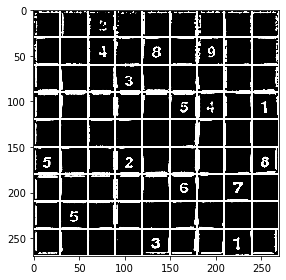

[[ 0.  0.  8.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  4.  0.  8.  0.  8.  0.  0.]
 [ 0.  0.  0.  5.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  5.  4.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 5.  0.  0.  8.  0.  0.  0.  0.  8.]
 [ 0.  0.  0.  0.  0.  6.  0.  7. nan]
 [ 0.  5.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  3.  0.  0.  1.  0.]]
16.jpg


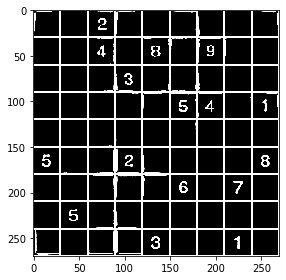

[[ 0. nan  2.  0. nan  0.  0.  0.  0.]
 [nan nan  4.  0.  8.  0.  9.  0.  0.]
 [ 0.  0.  0.  3.  0.  0.  0. nan  0.]
 [nan nan  0.  0.  0.  5.  4.  0.  1.]
 [nan nan  0.  0. nan  0. nan nan nan]
 [ 5.  0.  0.  2.  0.  0. nan nan  8.]
 [nan nan  0.  0.  0.  6. nan  7. nan]
 [nan  5.  0.  0. nan nan nan nan nan]
 [ 0. nan  0.  0.  3. nan nan  1. nan]]
12.jpg


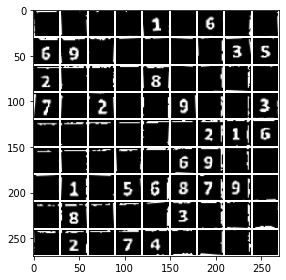

[[ 0.  0.  0.  0.  1.  0.  6.  0.  0.]
 [ 6.  6.  0.  0.  0.  0.  0.  3.  5.]
 [ 8.  0.  0.  0.  8.  0.  0.  0.  0.]
 [ 7.  0.  2.  0.  0.  9.  0.  0.  3.]
 [ 0.  0.  0.  0.  0.  0.  8.  8.  6.]
 [ 0.  0.  0.  0.  0.  6.  9.  0.  0.]
 [ 0.  1.  0.  5.  6.  8.  7.  9.  0.]
 [ 0.  8.  0.  0.  0.  3.  0.  0.  0.]
 [ 0.  2.  0.  7.  4.  0.  0.  0. nan]]
13.jpg


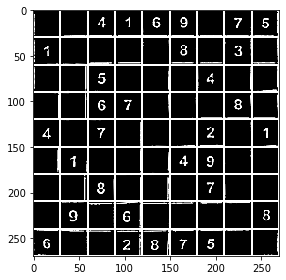

[[ 0.  0.  4.  1.  6.  9.  0.  7.  5.]
 [ 1.  0.  0.  0.  0.  8.  0.  3.  0.]
 [ 0.  0.  5.  0.  0.  0.  4.  0.  0.]
 [ 0.  0.  6.  7.  0.  0.  0.  8.  0.]
 [ 4.  0.  7.  0.  0.  0.  2.  0.  1.]
 [ 0.  1.  0.  0.  0.  4.  9.  0.  0.]
 [ 0.  0.  8.  0.  0. nan  7.  0.  0.]
 [ 0.  9.  0.  6.  0.  0.  0.  0.  8.]
 [ 6.  0.  0.  8.  8.  7.  5.  0.  0.]]
11.jpg


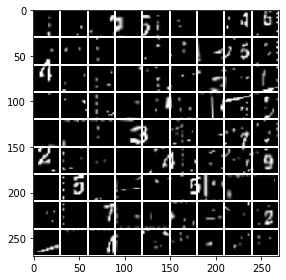

[[ 0.  0.  0.  0.  0.  0. nan  7.  9.]
 [ 0.  0.  0. nan  7.  1.  0.  0.  1.]
 [ 4.  0.  0.  0.  0.  0.  0.  0.  6.]
 [ 0.  0.  0.  0.  1.  0.  1.  3.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  7.  0.]
 [ 4.  0.  0. nan  0.  0.  0.  0.  1.]
 [nan  2.  0.  0.  7.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  2.  0.  7.]
 [ 3.  0.  0.  0.  0.  0.  1.  5.  0.]]
10.jpg


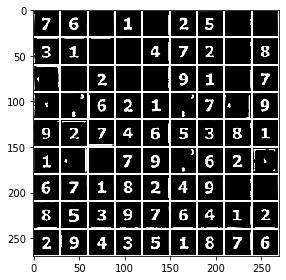

[[7 6 0 5 0 2 5 0 0]
 [3 1 0 0 4 7 2 0 8]
 [0 0 2 0 0 9 1 0 7]
 [5 5 6 2 1 5 7 0 9]
 [9 2 7 4 6 5 3 8 1]
 [1 0 0 7 9 0 6 2 0]
 [6 7 1 8 2 4 9 0 0]
 [8 5 3 9 7 6 4 5 2]
 [2 9 4 3 5 1 8 7 6]]
18.jpg


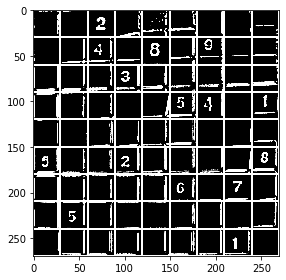

[[ 0.  0.  2.  0.  1.  2.  0.  0.  0.]
 [ 0.  0.  4.  0.  8.  1.  1.  2.  2.]
 [ 0.  0.  0.  3.  0.  3.  1.  2.  2.]
 [ 0.  0.  0.  0.  0.  5.  8.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 5.  0.  0.  2.  0.  0.  0.  0.  9.]
 [ 0.  0.  0.  0.  0.  9.  0.  7.  0.]
 [ 0.  5.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. nan]]
.ipynb_checkpoints
4.png


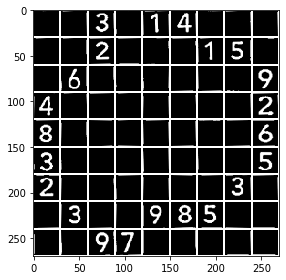

[[ 0.  0.  3.  0.  1.  4.  0.  0.  0.]
 [ 0.  0.  2.  0.  0.  0.  1.  5.  0.]
 [ 0.  6.  0.  0.  0.  0.  0.  0.  9.]
 [ 4.  0.  0.  0.  0.  0.  0.  0.  2.]
 [ 8.  0.  0.  0.  0.  0.  0.  0.  6.]
 [ 3.  0.  0.  0.  0.  0.  0.  0.  5.]
 [ 2.  0.  0.  0.  0.  0.  0.  3.  0.]
 [ 0.  3.  0.  0.  9.  8.  5.  0.  0.]
 [ 0.  0.  9.  7.  0.  0. nan  0.  0.]]
5.jpg


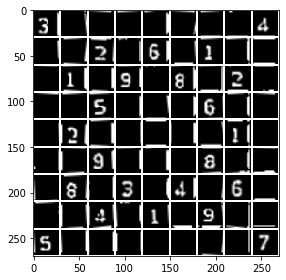

[[ 8.  0.  0.  0.  0.  0.  0.  0.  6.]
 [ 0.  0.  2.  0.  6.  0.  6.  0.  0.]
 [ 0.  0.  0.  9.  0.  8.  0.  3.  0.]
 [ 0.  0.  5.  0.  0.  0.  6.  0.  0.]
 [ 0.  3.  0.  0.  0.  0.  0.  8. nan]
 [ 0.  0.  8.  0.  0. nan  8.  0.  0.]
 [ 0.  8.  0.  3.  0.  6.  0.  6.  0.]
 [ 0.  0.  1.  0.  6.  0.  9.  0.  0.]
 [ 5.  0.  0.  0. nan nan  0.  0.  7.]]
7.png


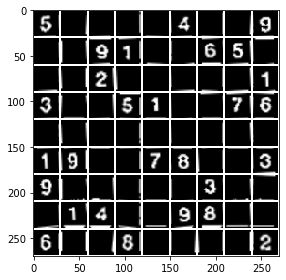

[[ 5.  0.  0.  0.  0.  4.  0.  0.  9.]
 [ 0.  0.  9.  1.  0.  0.  6.  5.  0.]
 [ 0.  0.  2.  0. nan  0.  0.  0.  1.]
 [ 3.  0.  0.  5.  1.  0.  0.  7.  6.]
 [ 0.  0.  0.  0. nan  0.  0.  0.  0.]
 [ 1.  9.  0.  0.  7.  8.  0.  0.  3.]
 [ 9.  0.  0.  0.  0.  0.  3.  0.  0.]
 [ 0.  1.  4.  0.  0.  9.  8.  0.  0.]
 [ 6.  0.  0.  8. nan  0.  0.  0.  2.]]
6.png


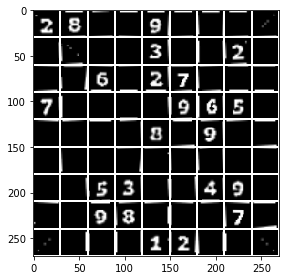

[[ 7.  8.  0.  0.  9.  0.  0.  0.  0.]
 [ 0.  0. nan nan  3. nan  0.  2. nan]
 [ 0.  0.  6.  0.  2.  7.  0.  0.  0.]
 [ 7.  0. nan  0.  0.  9.  6.  5. nan]
 [ 0.  0.  0.  0.  8.  0.  9.  0.  0.]
 [nan  0. nan  0.  0.  0.  0. nan  0.]
 [nan  0.  5.  3.  0.  0.  4.  9. nan]
 [ 0. nan  0.  8.  0.  0.  0.  7.  0.]
 [ 0.  0.  0.  0.  1.  2.  0.  0.  0.]]
2.jpg


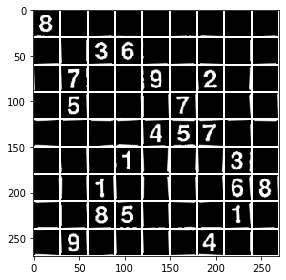

[[8 0 0 0 0 0 0 0 0]
 [0 0 3 6 0 0 0 0 0]
 [0 7 0 0 9 0 2 0 0]
 [0 5 0 0 0 7 0 0 0]
 [0 0 0 0 4 5 7 0 0]
 [0 0 0 1 0 0 0 3 0]
 [0 0 1 0 0 0 0 6 8]
 [0 0 8 5 0 0 0 1 0]
 [0 9 0 0 0 0 4 0 0]]
3.jpg


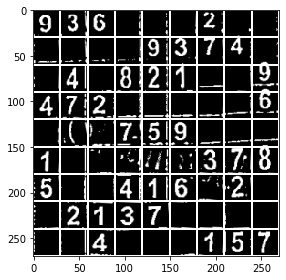

[[ 9.  3.  6.  0.  0.  0.  4.  0.  0.]
 [ 0.  0.  0.  0.  3.  3.  4.  4.  0.]
 [ 0.  1.  0.  6.  2.  8.  0.  0.  2.]
 [ 4.  2.  2.  0.  0.  0.  0.  0.  9.]
 [ 0.  6.  0.  2.  5.  3.  0.  0.  0.]
 [ 1.  0.  0.  5.  4.  5.  3.  1.  6.]
 [ 5.  0.  0.  1.  8.  5.  0.  2.  0.]
 [ 0.  2.  1.  3.  7.  0.  0.  0. nan]
 [ 0.  0.  6.  0. nan  0.  1.  5.  7.]]
1.jpg


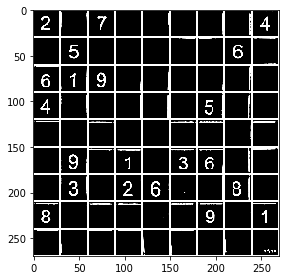

[[ 2.  0.  7.  0.  0. nan  0.  0.  4.]
 [nan  5. nan nan nan  0.  0.  6.  0.]
 [ 8.  1.  9.  0.  0.  0.  0.  0.  0.]
 [ 4.  0. nan  0.  0. nan  5.  0. nan]
 [ 0. nan  0. nan nan  0.  0.  0.  0.]
 [ 0.  9.  0.  7. nan  3.  6.  0.  0.]
 [ 0.  3. nan  2.  6.  0.  0.  8. nan]
 [ 8.  0.  0.  0.  0.  0.  9.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [75]:
for filename in os.listdir('data/examples/'):
    print(filename)
    if filename.endswith(".jpg") or filename.endswith(".png"): 
         parse_sudoku('data/examples/' + filename)

In [5]:
from optimizer import solve_sudoku

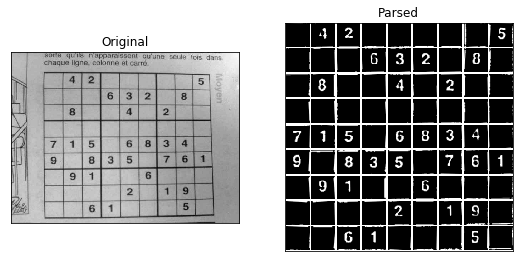

In [22]:
# img = load_image('data/train/image1.jpg')
# digits = parse_grid(img)
# for i in range(len(digits)):
#     print((digits[i]/255).mean())

sudoku = plot_example('data/train/image10.jpg')

In [59]:
where_are_nans = np.isnan(sudoku)
sudoku[where_are_nans] = 0

In [60]:
sol_matrix = solve_sudoku(sudoku)

[[1 4 9 5 7 8 3 6 2]
 [2 6 7 3 9 1 5 4 8]
 [3 5 8 2 4 6 1 7 9]
 [5 9 1 4 8 2 6 3 7]
 [8 7 6 9 5 3 4 2 1]
 [4 2 3 1 6 7 8 9 5]
 [9 1 4 7 3 5 2 8 6]
 [6 3 5 8 2 9 7 1 4]
 [7 8 2 6 1 4 9 5 3]]


In [17]:
sol_matrix.shape

(9, 9)